In [68]:
import requests
from bs4 import BeautifulSoup
import networkx as nx

In [69]:
url = "https://tfl.gov.uk/travel-information/stations-stops-and-piers/"

response = requests.get(url)
response.raise_for_status()

soup = BeautifulSoup(response.text, 'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<!-- tfl-probe -->
<!--[if IE 7]>         <html lang="en" class="no-js lt-ie10 lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html lang="en" class="no-js lt-ie10 lt-ie9"> <![endif]-->
<!--[if IE 9]>         <html lang="en" class="no-js lt-ie10"> <![endif]-->
<!--[if gt IE 9]><!-->
<html class="no-js no-touch" lang="en-GB">
 <!--<![endif]-->
 <head>
  <script async="" data-cbid="e601acc6-2e6f-4bed-a826-046477b39b61" data-framework="TCFv2.2" id="Cookiebot" src="https://consent.cookiebot.com/uc.js" type="text/javascript">
  </script>
  <script async="" src="//assets.adobedtm.com/launch-ENc5e3f827edc94f2a816110524598acd7.min.js">
  </script>
  <script async="" src="//translate.google.com/translate_a/element.js?cb=googleTranslateElementInit">
  </script>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8"/>
  <link href="/cdn/static/assets/icons/favicon-v2.ico" rel="shortcut icon" type="image/x-icon"/>
  <link href="/cdn/static/assets/icons

In [70]:
ul_list = soup.find_all('ul', class_='routes-list')
a_list = []

for ul in ul_list:
    li_list = ul.find_all('li')

    for li in li_list:
        a_tags = li.find_all('a')

        for a in a_tags:
            href = a.get('href')
            a_list.append(f"https://tfl.gov.uk{href}")

print(a_list)

# get the name of the station from the href
line_list = [f'Line_{x.split("/")[-2]}' for x in a_list]
print(line_list)

['https://tfl.gov.uk/tube/route/bakerloo/', 'https://tfl.gov.uk/tube/route/central/', 'https://tfl.gov.uk/tube/route/circle/', 'https://tfl.gov.uk/tube/route/district/', 'https://tfl.gov.uk/dlr/route/dlr/', 'https://tfl.gov.uk/elizabeth-line/route/elizabeth/', 'https://tfl.gov.uk/tube/route/hammersmith-city/', 'https://tfl.gov.uk/cable-car/route/london-cable-car/', 'https://tfl.gov.uk/tube/route/jubilee/', 'https://tfl.gov.uk/overground/route/liberty/', 'https://tfl.gov.uk/overground/route/lioness/', 'https://tfl.gov.uk/tube/route/metropolitan/', 'https://tfl.gov.uk/overground/route/mildmay/', 'https://tfl.gov.uk/tube/route/northern/', 'https://tfl.gov.uk/tube/route/piccadilly/', 'https://tfl.gov.uk/overground/route/suffragette/', 'https://tfl.gov.uk/tram/route/tram/', 'https://tfl.gov.uk/tube/route/victoria/', 'https://tfl.gov.uk/tube/route/waterloo-city/', 'https://tfl.gov.uk/overground/route/weaver/', 'https://tfl.gov.uk/overground/route/windrush/', 'https://tfl.gov.uk/river-bus/rou

In [71]:
def build_network(url):
    arr = []
    response = requests.get(url)
    response.raise_for_status()

    soup = BeautifulSoup(response.text, 'html.parser')
    stations_list = soup.find('ul', class_='stop-list')
    stations = stations_list.find_all('a', class_='stop-link')

    for station in stations:
        station_name = station.contents[0].strip()
        arr.append(station_name)
    return arr

build_network(a_list[0])

['Elephant & Castle Underground Station',
 'Lambeth North Underground Station',
 'Waterloo Underground Station',
 'Embankment Underground Station',
 'Charing Cross Underground Station',
 'Piccadilly Circus Underground Station',
 'Oxford Circus Underground Station',
 "Regent's Park Underground Station",
 'Baker Street Underground Station',
 'Marylebone Underground Station',
 'Edgware Road (Bakerloo) Underground Station',
 'Paddington Underground Station',
 'Warwick Avenue Underground Station',
 'Maida Vale Underground Station',
 'Kilburn Park Underground Station',
 "Queen's Park Underground Station",
 'Kensal Green Underground Station',
 'Willesden Junction Underground Station',
 'Harlesden Underground Station',
 'Stonebridge Park Underground Station',
 'Wembley Central Underground Station',
 'North Wembley Underground Station',
 'South Kenton Underground Station',
 'Kenton Underground Station',
 'Harrow & Wealdstone Underground Station']

In [72]:
G = nx.Graph()
for line, link in zip(line_list, a_list):
    stations = build_network(link)
    for i in range(len(stations) - 1):
        G.add_edge(stations[i], stations[i + 1], line=line)

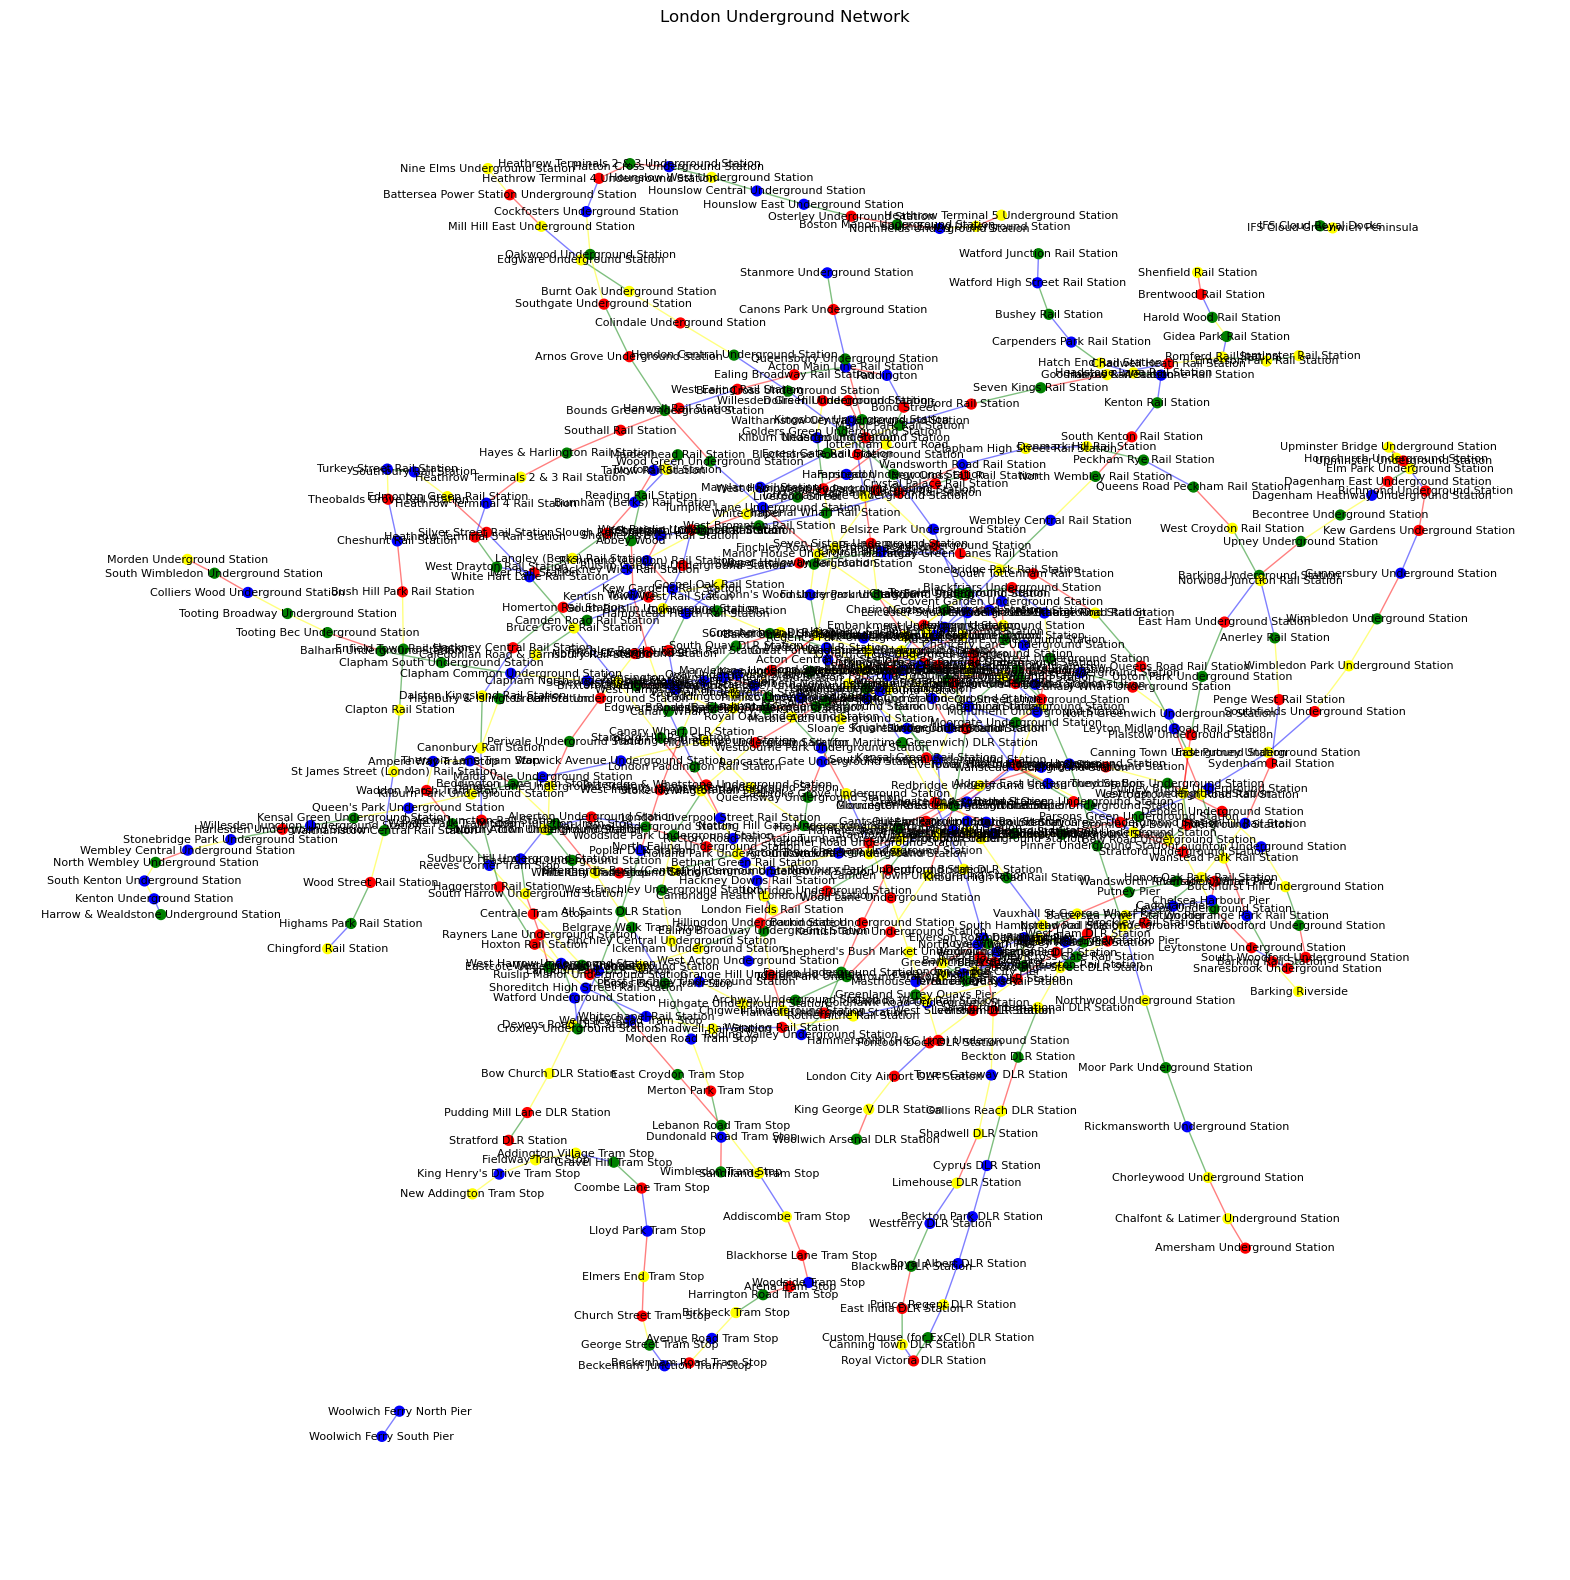

In [73]:
# plot the graph
import matplotlib.pyplot as plt
import random
import numpy as np

def plot_graph(G):
    pos = nx.spring_layout(G, seed=42)  # positions for all nodes
    plt.figure(figsize=(20, 20))

    # Draw nodes and edges with colors
    node_colors = [random.choice(['red', 'blue', 'green', 'yellow']) for _ in G.nodes()]
    edge_colors = [random.choice(['red', 'blue', 'green', 'yellow']) for _ in G.edges()]

    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=50)
    nx.draw_networkx_edges(G, pos, edge_color=edge_colors, alpha=0.5)

    # Draw labels
    labels = {node: node for node in G.nodes()}
    nx.draw_networkx_labels(G, pos, labels=labels, font_size=8)

    plt.title("London Underground Network")
    plt.axis('off')
    plt.show()
plot_graph(G)

In [74]:
# calculate the importance

def calculate_importance(G):
    # Degree centrality
    degree_centrality = nx.degree_centrality(G)

    # Betweenness centrality
    betweenness_centrality = nx.betweenness_centrality(G)

    # Closeness centrality
    closeness_centrality = nx.closeness_centrality(G)

    # PageRank
    pagerank = nx.pagerank(G)

    return degree_centrality, betweenness_centrality, closeness_centrality, pagerank

degree_centrality, betweenness_centrality, closeness_centrality, pagerank = calculate_importance(G)

print("Degree Centrality:")
for station, value in degree_centrality.items():
    print(f"{station}: {value:.4f}")
    

Degree Centrality:
Elephant & Castle Underground Station: 0.0056
Lambeth North Underground Station: 0.0037
Waterloo Underground Station: 0.0112
Embankment Underground Station: 0.0075
Charing Cross Underground Station: 0.0056
Piccadilly Circus Underground Station: 0.0075
Oxford Circus Underground Station: 0.0112
Regent's Park Underground Station: 0.0037
Baker Street Underground Station: 0.0131
Marylebone Underground Station: 0.0037
Edgware Road (Bakerloo) Underground Station: 0.0037
Paddington Underground Station: 0.0075
Warwick Avenue Underground Station: 0.0037
Maida Vale Underground Station: 0.0037
Kilburn Park Underground Station: 0.0037
Queen's Park Underground Station: 0.0037
Kensal Green Underground Station: 0.0037
Willesden Junction Underground Station: 0.0037
Harlesden Underground Station: 0.0037
Stonebridge Park Underground Station: 0.0037
Wembley Central Underground Station: 0.0037
North Wembley Underground Station: 0.0037
South Kenton Underground Station: 0.0037
Kenton Under

In [75]:
# calculate the centrality of each station (max 3)
centrality = nx.degree_centrality(G)
sorted_centrality = sorted(centrality.items(), key=lambda x: x[1], reverse=True)
print("Top 3 stations by degree centrality:")
for station, centrality in sorted_centrality[:3]:
    print(f"{station}: {centrality:.4f}")
# calculate the betweenness centrality of each station (max 3)
betweenness = nx.betweenness_centrality(G)
sorted_betweenness = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)
print("Top 3 stations by betweenness centrality:")
for station, centrality in sorted_betweenness[:3]:
    print(f"{station}: {centrality:.4f}")
# calculate the closeness centrality of each station (max 3)
closeness = nx.closeness_centrality(G)
sorted_closeness = sorted(closeness.items(), key=lambda x: x[1], reverse=True)
print("Top 3 stations by closeness centrality:")
for station, centrality in sorted_closeness[:3]:
    print(f"{station}: {centrality:.4f}")


Top 3 stations by degree centrality:
King's Cross St. Pancras Underground Station: 0.0149
Baker Street Underground Station: 0.0131
Waterloo Underground Station: 0.0112
Top 3 stations by betweenness centrality:
Baker Street Underground Station: 0.0836
King's Cross St. Pancras Underground Station: 0.0762
Green Park Underground Station: 0.0734
Top 3 stations by closeness centrality:
Green Park Underground Station: 0.0573
Bond Street Underground Station: 0.0560
Oxford Circus Underground Station: 0.0555
